In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from wordcloud import WordCloud

In [2]:
os.getcwd()

'C:\\Users\\Petro\\Desktop\\VA_Project_Group_8\\Visual_Analytics_ML'

# Load Dataset

In [3]:
data = pd.read_csv('review.csv')

# Analysis of the Dataset

In [4]:
data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,latitude,longitude
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35.888455,-119.273781
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,37.770971,-119.941025
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,35.684863,-119.709299
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,37.061159,-119.279135
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,36.790587,-120.867752


In [5]:
data.text[1]

"@VirginAmerica plus you've added commercials to the experience... tacky."

In [6]:
data.shape

(14640, 12)

In [7]:
data.isnull().any()

tweet_id                        False
airline_sentiment               False
airline_sentiment_confidence    False
negativereason                   True
negativereason_confidence        True
airline                         False
name                            False
retweet_count                   False
text                            False
tweet_created                   False
latitude                        False
longitude                       False
dtype: bool

In [8]:
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [9]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

# Cleaning Text 


In [10]:
import re
import nltk

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Petro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Petro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

In [13]:
names = ['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
         'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
         'flight', 'airline', 'airlines']


In [14]:
def clean_stopword(d):
    stop_words = stopwords.words('english')
    for name in names:
        stop_words.append(name)
    return " ".join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])

def tokenize(d):
    return word_tokenize(d)

In [15]:
data['final_text']= data.text.apply(clean_text).apply(clean_stopword).apply(tokenize)
data.final_text.head()

0                                     [dhepburn, said]
1    [plus, youve, added, commercials, experience, ...
2    [didnt, today, must, mean, need, take, another...
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
Name: final_text, dtype: object

In [16]:
data.final_text[1]

['plus', 'youve', 'added', 'commercials', 'experience', 'tacky']

In [17]:
data.final_text

0                                         [dhepburn, said]
1        [plus, youve, added, commercials, experience, ...
2        [didnt, today, must, mean, need, take, another...
3        [really, aggressive, blast, obnoxious, enterta...
4                                [really, big, bad, thing]
                               ...                        
14635                     [thank, got, different, chicago]
14636    [leaving, minutes, late, warnings, communicati...
14637                          [please, bring, blackberry]
14638    [money, change, dont, answer, phones, suggesti...
14639    [ppl, need, know, many, seats, next, plz, put,...
Name: final_text, Length: 14640, dtype: object

In [18]:
#In Data right now there is Lsit of String, to vectorize it we need just the Strings
for i in range(len(data)):
    data['final_text'][i] = " ".join(data['final_text'][i])

C:\Users\Petro\AppData\Local\Temp/ipykernel_19184/1550234050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_text'][i] = " ".join(data['final_text'][i])


In [19]:
data.final_text[1]

'plus youve added commercials experience tacky'

# Machine Learnig 


In [20]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Model
import pickle

In [ ]:
from tensorflow.keras.layers import *
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, model_from_json

In [21]:
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0
    
data.airline_sentiment = data.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [22]:
X = data.final_text
y = data.airline_sentiment

In [24]:
vectorizer = TfidfVectorizer(max_features=50000)

In [25]:
#vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(X)

TfidfVectorizer(max_features=50000)

In [26]:
vectorizer.transform(X).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
sentences_train, sentences_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [28]:
selected_categories=['negative','neutral','positive']

In [29]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<10980x12165 sparse matrix of type '<class 'numpy.int64'>'
	with 92726 stored elements in Compressed Sparse Row format>

In [30]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [32]:
pd.DataFrame(X_test).to_csv("X_test.csv")

In [33]:
sentences_test.to_csv("sentences_test.csv", index=False)

In [34]:
len(vectorizer.vocabulary_)

12165

In [35]:
X_train.shape

(10980, 12165)

In [36]:
def create_model():
    return Sequential([
                        layers.Input(shape=X_train.shape[1:]),
                        layers.Dense(128, activation="relu"),
                        layers.Dense(64, activation="relu"),
                        layers.Dense(len(selected_categories), activation="softmax"),
                    ])

model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1557248   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 1,565,699
Trainable params: 1,565,699
Non-trainable params: 0
_________________________________________________________________


In [37]:
type(sentences_test)

pandas.core.series.Series

In [38]:
model.compile(loss='sparse_categorical_crossentropy', 
           optimizer='adam', 
           metrics=['accuracy'])

In [39]:
es = EarlyStopping(patience=2, verbose=1, restore_best_weights=True)

In [40]:
 history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose='auto',
                    validation_data=(X_test, y_test),
                    batch_size=250,
                    callbacks=[es],
                    
)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping


In [41]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9036
Testing Accuracy:  0.8000


In [42]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()



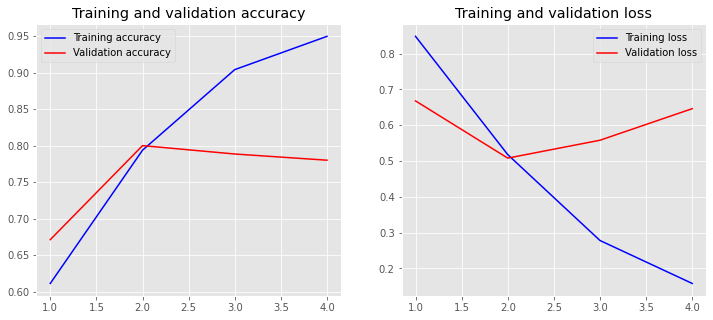

In [43]:
plot_history(history)

# Visual Analytic

In [46]:
import numpy as np
import shap

In [47]:
selected_categories=['negative','neutral','positive']

In [48]:
def make_predictions(X_batch_text):
    X_batch = vectorizer.transform(X_batch_text).toarray()
    preds = model.predict(X_batch)
    return preds

masker = shap.maskers.Text(tokenizer=r"\W+")
explainer = shap.Explainer(make_predictions, masker=masker,output_names=selected_categories)

explainer

In [49]:
import re

X_batch_text = sentences_test[1:3]
X_batch = X_test[1:3]

print("Samples : ")
for text in X_batch_text:
    print(re.split(r"\W+", text))
    print()

preds_proba = model.predict(X_batch)
preds = preds_proba.argmax(axis=1)

print("Actual    Target Values : {}".format([selected_categories[target] for target in y_test[1:3]]))
print("Predicted Target Values : {}".format([selected_categories[target] for target in preds]))
print("Predicted Probabilities : {}".format(preds_proba.max()))

shap_values = explainer(X_batch_text)

Samples : 
['going', 'nightmare', 'guys', 'yesterday', 'zero', 'response', 'tweet', 'last', 'sent']

['late', 'flightly', 'youve', 'always', 'late', 'please', 'get', 'back', 'old', 'swa']

Actual    Target Values : ['negative', 'negative']
Predicted Target Values : ['negative', 'negative']
Predicted Probabilities : 0.9790316820144653


In [50]:
print("SHAP Values Shape : {}".format(shap_values.shape))
print("SHAP Base Values  : {}".format(shap_values.base_values))
print("SHAP Data : ")
print(shap_values.data[0])
print(shap_values.data[1])




SHAP Values Shape : (2, None, 3)
SHAP Base Values  : [[0.29425439 0.51200998 0.19373557]
 [0.29425439 0.51200998 0.19373557]]
SHAP Data : 
['going ' 'nightmare ' 'guys ' 'yesterday ' 'zero ' 'response ' 'tweet '
 'last ' 'sent']
['late ' 'flightly ' 'youve ' 'always ' 'late ' 'please ' 'get ' 'back '
 'old ' 'swa']


In [51]:
text_plot_1=shap.text_plot(shap_values)
type(text_plot_1)

NoneType

In [52]:
shap.text_plot(shap_values)

In [93]:
np.__version__

'1.18.5'

# Save and Load Model


In [46]:
from tensorflow.keras.models import Sequential, model_from_yaml

Saved model to disk


In [44]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [47]:
# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [48]:
loaded_model
